In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('USER_INFO_M.csv', encoding='gbk')  

In [3]:
data.head()

,MONTH_ID,USER_ID,INNET_MONTH,IS_AGREE,AGREE_EXP_DATE,CREDIT_LEVEL,VIP_LVL,ACCT_FEE,CALL_DURA,NO_ROAM_LOCAL_CALL_DURA,...,CALLING_RING,CALLED_RING,CUST_SEX,CERT_AGE,CONSTELLATION_DESC,MANU_NAME,MODEL_NAME,OS_DESC,TERM_TYPE,IS_LOST
0,201601,U3115092040504266,62,1,201609.0,65,99.0,84.95,36891,2699,...,48,64,1.0,29.0,射手座,赫比,YD206,ANDROID 4.4.3,4,NaN
1,201601,U3115090138635105,5,1,201609.0,66,NaN,251.78,28858,889,...,39,30,1.0,23.0,白羊座,赫比,YD206,ANDROID 4.4.3,4,NaN
2,201601,U3115062769878916,171,0,NaN,67,99.0,26.00,14838,14812,...,20,66,1.0,38.0,射手座,赫比,YD206,ANDROID 4.4.3,4,NaN
3,201601,U3115061733263650,8,1,201606.0,66,99.0,139.30,11144,0,...,27,31,2.0,23.0,天蝎座,赫比,YD206,ANDROID 4.4.3,4,NaN
4,201601,U3115060569699130,8,0,NaN,67,99.0,31.95,5528,5528,...,9,13,2.0,33.0,双子座,赫比,YD206,ANDROID 4.4.3,4,NaN


In [4]:
data.shape

(900000, 35)

In [5]:
data.duplicated().sum()

96

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop(['MANU_NAME', 'MODEL_NAME', 'OS_DESC', 'CONSTELLATION_DESC'], axis=1, inplace=True)

In [9]:
data.shape

(899904, 31)

In [10]:
data_group = data.groupby('USER_ID')

In [11]:
#list(data_group)

In [12]:
label = data_group[['USER_ID', 'IS_LOST']].tail(1)  #提取最后一行数据

In [13]:
label.head()

,USER_ID,IS_LOST
599691,U3116011101365327,0.0
599692,U3115122549657565,0.0
599693,U3115122771884179,1.0
599694,U3115122749792284,0.0
599695,U3115121571754202,0.0


In [14]:
label.set_index('USER_ID', inplace=True)

In [15]:
label.head()

,IS_LOST
USER_ID,
U3116011101365327,0.0
U3115122549657565,0.0
U3115122771884179,1.0
U3115122749792284,0.0
U3115121571754202,0.0


In [16]:
data_f1 = data_group[['CUST_SEX', 'CERT_AGE', 'TERM_TYPE']].first()#提取第一行数据
data_f1.head()

,CUST_SEX,CERT_AGE,TERM_TYPE
USER_ID,,,
U3114031824148707,1.0,22.0,3
U3114031824148874,2.0,30.0,4
U3114031824148975,2.0,42.0,4
U3114031824149138,2.0,22.0,3
U3114031824149150,1.0,30.0,4


In [17]:
data_f2 = data_group['INNET_MONTH'].last()

In [18]:
data_f2.head()

USER_ID
U3114031824148707    25
U3114031824148874    25
U3114031824148975    25
U3114031824149138    25
U3114031824149150    25
Name: INNET_MONTH, dtype: int64

In [19]:
def cal_is_agree(x):
    x = np.array(x)  
    if x.sum() == 3:
        return 1.5
    else:
        return x[2] - x[:2].mean()

In [20]:
data_f3 = pd.DataFrame(data_group['IS_AGREE'].agg(cal_is_agree))

In [21]:
data_f3.head()

,IS_AGREE
USER_ID,
U3114031824148707,0.0
U3114031824148874,1.5
U3114031824148975,1.5
U3114031824149138,0.0
U3114031824149150,0.0


In [22]:
#list(data_group['IS_AGREE'])

In [23]:
temp = data_group['AGREE_EXP_DATE'].last()

In [24]:
temp.head()

USER_ID
U3114031824148707         NaN
U3114031824148874    201603.0
U3114031824148975    201603.0
U3114031824149138         NaN
U3114031824149150         NaN
Name: AGREE_EXP_DATE, dtype: float64

In [25]:
temp = (pd.to_datetime(temp, format='%Y%m') - pd.to_datetime('2016-03-01')).dt.days/30

In [26]:
temp.head()

USER_ID
U3114031824148707    NaN
U3114031824148874    0.0
U3114031824148975    0.0
U3114031824149138    NaN
U3114031824149150    NaN
Name: AGREE_EXP_DATE, dtype: float64

In [27]:
data_f4 = pd.DataFrame(temp).fillna(-1)    #用-1填充缺失值

In [28]:
data_f4.head()

,AGREE_EXP_DATE
USER_ID,
U3114031824148707,-1.0
U3114031824148874,0.0
U3114031824148975,0.0
U3114031824149138,-1.0
U3114031824149150,-1.0


In [29]:
data_f5 = pd.DataFrame(data_group['CREDIT_LEVEL'].agg('mean'))

In [30]:
data_f5.head()

,CREDIT_LEVEL
USER_ID,
U3114031824148707,67.0
U3114031824148874,65.0
U3114031824148975,65.0
U3114031824149138,65.0
U3114031824149150,65.0


In [31]:
def cal_vip_lvl(x):
    a = np.array(x)
    if a[0] == a[2] == a[1]:
        return a[2]
    else:
        return a[2] - np.mean(a[:2])

In [32]:
#list(data_group['VIP_LVL'])

In [33]:
data_f6 = pd.DataFrame(data_group['VIP_LVL'].agg(cal_vip_lvl).fillna(0))

In [34]:
data_f6.head()

,VIP_LVL
USER_ID,
U3114031824148707,99.0
U3114031824148874,99.0
U3114031824148975,99.0
U3114031824149138,99.0
U3114031824149150,99.0


In [35]:
data_f7 = pd.DataFrame(data_group['ACCT_FEE'].mean())

In [36]:
data_f7.head()

,ACCT_FEE
USER_ID,
U3114031824148707,79.050000
U3114031824148874,258.456667
U3114031824148975,166.033333
U3114031824149138,141.950000
U3114031824149150,80.666667


In [37]:
data_f8_1 = pd.DataFrame(data_group['CALL_DURA'].sum()/data_group['CDR_NUM'].sum(), columns=['Total_mean'])
data_f8_2 = pd.DataFrame(data_group['NO_ROAM_LOCAL_CALL_DURA'].sum()/data_group['NO_ROAM_LOCAL_CDR_NUM'].sum(),columns=['Local_mean'])
data_f8_3 = pd.DataFrame(data_group['NO_ROAM_GN_LONG_CALL_DURA'].sum() / data_group['NO_ROAM_GN_LONG_CDR_NUM'].sum(),columns=['GN_Long_mean'])
data_f8_4 = pd.DataFrame(data_group['GN_ROAM_CALL_DURA'].sum() / data_group['GN_ROAM_CDR_NUM'].sum(),columns=['GN_Roam_mean'])
data_f8 = pd.concat([data_f8_1, data_f8_2, data_f8_3, data_f8_4], axis=1).fillna(0)

In [38]:
data_f8.head()

,Total_mean,Local_mean,GN_Long_mean,GN_Roam_mean
USER_ID,,,,
U3114031824148707,46.749627,0.000000,0.000000,46.749627
U3114031824148874,72.539206,70.639311,149.846154,65.800000
U3114031824148975,108.124549,88.598540,206.173913,88.601064
U3114031824149138,186.905632,147.475248,228.410959,193.071197
U3114031824149150,49.409639,51.888889,0.000000,33.181818


In [39]:
data_f9 = data_group[['NO_ROAM_CDR_NUM', 'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX',
                      'GN_ROAM_FLUX', 'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS', 'CALL_RING',
                      'CALLING_RING', 'CALLED_RING']].agg('mean')

In [40]:
data_f9.head()

,NO_ROAM_CDR_NUM,P2P_SMS_CNT_UP,TOTAL_FLUX,LOCAL_FLUX,GN_ROAM_FLUX,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING
USER_ID,,,,,,,,,,,
U3114031824148707,0.000000,6.000000,436.547473,0.000000,436.547473,27.333333,23.000000,25.000000,37.333333,27.666667,25.666667
U3114031824148874,337.666667,57.333333,3904.953132,3865.186314,39.766818,30.000000,25.333333,30.000000,94.333333,42.666667,74.000000
U3114031824148975,122.000000,23.000000,2696.364450,2150.793577,545.570873,29.666667,29.333333,24.666667,37.666667,30.666667,26.000000
U3114031824149138,116.000000,78.000000,643.690048,345.069051,298.620997,29.666667,28.333333,27.333333,35.333333,26.333333,21.333333
U3114031824149150,24.000000,0.666667,161.041526,161.041526,0.000000,6.666667,5.666667,6.666667,8.666667,1.666667,7.666667


In [41]:
# 对所有特征&标签按索引重新排序，以保证数据拼接时索引一致
label.sort_index(inplace=True) 
data_f1.sort_index(inplace=True)
data_f2.sort_index(inplace=True)
data_f3.sort_index(inplace=True)
data_f4.sort_index(inplace=True)
data_f5.sort_index(inplace=True)
data_f6.sort_index(inplace=True)
data_f7.sort_index(inplace=True)
data_f8.sort_index(inplace=True)
data_f9.sort_index(inplace=True)

In [42]:
data_new = pd.concat([data_f1, data_f2, data_f3, data_f4,data_f5, data_f6, data_f7, data_f8, data_f9, label], axis=1)

In [43]:
data_new.head()

,CUST_SEX,CERT_AGE,TERM_TYPE,INNET_MONTH,IS_AGREE,AGREE_EXP_DATE,CREDIT_LEVEL,VIP_LVL,ACCT_FEE,Total_mean,...,TOTAL_FLUX,LOCAL_FLUX,GN_ROAM_FLUX,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING,IS_LOST
USER_ID,,,,,,,,,,,,,,,,,,,,,
U3114031824148707,1.0,22.0,3,25,0.0,-1.0,67.0,99.0,79.050000,46.749627,...,436.547473,0.000000,436.547473,27.333333,23.000000,25.000000,37.333333,27.666667,25.666667,0.0
U3114031824148874,2.0,30.0,4,25,1.5,0.0,65.0,99.0,258.456667,72.539206,...,3904.953132,3865.186314,39.766818,30.000000,25.333333,30.000000,94.333333,42.666667,74.000000,0.0
U3114031824148975,2.0,42.0,4,25,1.5,0.0,65.0,99.0,166.033333,108.124549,...,2696.364450,2150.793577,545.570873,29.666667,29.333333,24.666667,37.666667,30.666667,26.000000,0.0
U3114031824149138,2.0,22.0,3,25,0.0,-1.0,65.0,99.0,141.950000,186.905632,...,643.690048,345.069051,298.620997,29.666667,28.333333,27.333333,35.333333,26.333333,21.333333,0.0
U3114031824149150,1.0,30.0,4,25,0.0,-1.0,65.0,99.0,80.666667,49.409639,...,161.041526,161.041526,0.000000,6.666667,5.666667,6.666667,8.666667,1.666667,7.666667,0.0


In [44]:
data_new.isnull().sum()

CUST_SEX           11429
CERT_AGE           11657
TERM_TYPE              0
INNET_MONTH            0
IS_AGREE               0
AGREE_EXP_DATE         0
CREDIT_LEVEL           0
VIP_LVL                0
ACCT_FEE               0
Total_mean             0
Local_mean             0
GN_Long_mean           0
GN_Roam_mean           0
NO_ROAM_CDR_NUM        0
P2P_SMS_CNT_UP         0
TOTAL_FLUX             0
LOCAL_FLUX             0
GN_ROAM_FLUX           0
CALL_DAYS              0
CALLING_DAYS           0
CALLED_DAYS            0
CALL_RING              0
CALLING_RING           0
CALLED_RING            0
IS_LOST                0
dtype: int64

In [45]:
data_new = data_new.fillna(method='ffill')
# 用近邻值对缺失值进行填充,backfill和bfill代表填充后侧值，ffill和pad填充空值前侧值

In [46]:
data_new.isnull().sum()

CUST_SEX           0
CERT_AGE           0
TERM_TYPE          0
INNET_MONTH        0
IS_AGREE           0
AGREE_EXP_DATE     0
CREDIT_LEVEL       0
VIP_LVL            0
ACCT_FEE           0
Total_mean         0
Local_mean         0
GN_Long_mean       0
GN_Roam_mean       0
NO_ROAM_CDR_NUM    0
P2P_SMS_CNT_UP     0
TOTAL_FLUX         0
LOCAL_FLUX         0
GN_ROAM_FLUX       0
CALL_DAYS          0
CALLING_DAYS       0
CALLED_DAYS        0
CALL_RING          0
CALLING_RING       0
CALLED_RING        0
IS_LOST            0
dtype: int64

In [47]:
data_new.head()

,CUST_SEX,CERT_AGE,TERM_TYPE,INNET_MONTH,IS_AGREE,AGREE_EXP_DATE,CREDIT_LEVEL,VIP_LVL,ACCT_FEE,Total_mean,...,TOTAL_FLUX,LOCAL_FLUX,GN_ROAM_FLUX,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING,IS_LOST
USER_ID,,,,,,,,,,,,,,,,,,,,,
U3114031824148707,1.0,22.0,3,25,0.0,-1.0,67.0,99.0,79.050000,46.749627,...,436.547473,0.000000,436.547473,27.333333,23.000000,25.000000,37.333333,27.666667,25.666667,0.0
U3114031824148874,2.0,30.0,4,25,1.5,0.0,65.0,99.0,258.456667,72.539206,...,3904.953132,3865.186314,39.766818,30.000000,25.333333,30.000000,94.333333,42.666667,74.000000,0.0
U3114031824148975,2.0,42.0,4,25,1.5,0.0,65.0,99.0,166.033333,108.124549,...,2696.364450,2150.793577,545.570873,29.666667,29.333333,24.666667,37.666667,30.666667,26.000000,0.0
U3114031824149138,2.0,22.0,3,25,0.0,-1.0,65.0,99.0,141.950000,186.905632,...,643.690048,345.069051,298.620997,29.666667,28.333333,27.333333,35.333333,26.333333,21.333333,0.0
U3114031824149150,1.0,30.0,4,25,0.0,-1.0,65.0,99.0,80.666667,49.409639,...,161.041526,161.041526,0.000000,6.666667,5.666667,6.666667,8.666667,1.666667,7.666667,0.0


In [48]:
corr = data_new.corr() #Method of correlation:默认"pearson"

In [49]:
corr

,CUST_SEX,CERT_AGE,TERM_TYPE,INNET_MONTH,IS_AGREE,AGREE_EXP_DATE,CREDIT_LEVEL,VIP_LVL,ACCT_FEE,Total_mean,...,TOTAL_FLUX,LOCAL_FLUX,GN_ROAM_FLUX,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING,IS_LOST
CUST_SEX,1.000000,-0.042096,0.038996,-0.040718,0.002602,-0.013240,0.014185,0.002013,-0.018024,0.085011,...,-0.034450,-0.013217,-0.052077,-0.001711,-0.015871,-0.019832,-0.077513,-0.084685,-0.074314,-0.009849
CERT_AGE,-0.042096,1.000000,-0.134737,0.312826,0.028570,0.053480,-0.085256,-0.047013,-0.035755,0.003075,...,-0.117754,-0.081422,-0.110112,-0.054897,-0.012142,-0.068055,0.026371,0.029054,0.024650,-0.023627
TERM_TYPE,0.038996,-0.134737,1.000000,0.072637,0.103954,0.076155,-0.101733,0.046174,0.152813,-0.054359,...,0.182956,0.159719,0.107603,0.183868,0.158814,0.208627,0.141122,0.100815,0.167950,-0.071245
INNET_MONTH,-0.040718,0.312826,0.072637,1.000000,0.051558,0.099593,-0.288422,0.063525,0.088719,-0.107779,...,0.047189,0.051965,0.007070,0.293048,0.263556,0.341129,0.269517,0.175949,0.354842,-0.119399
IS_AGREE,0.002602,0.028570,0.103954,0.051558,1.000000,0.565501,-0.291940,-0.085038,0.160131,0.034771,...,0.070238,0.052569,0.057737,0.178418,0.221057,0.160375,0.134881,0.127495,0.140962,-0.066514
AGREE_EXP_DATE,-0.013240,0.053480,0.076155,0.099593,0.565501,1.000000,-0.206191,-0.124866,0.173536,0.021103,...,0.086130,0.066825,0.066284,0.137495,0.179465,0.133933,0.133231,0.122269,0.144768,-0.062744
CREDIT_LEVEL,0.014185,-0.085256,-0.101733,-0.288422,-0.291940,-0.206191,1.000000,-0.003117,-0.202109,0.009390,...,-0.147455,-0.126397,-0.090304,-0.203495,-0.225580,-0.215082,-0.201426,-0.152079,-0.234676,0.094863
VIP_LVL,0.002013,-0.047013,0.046174,0.063525,-0.085038,-0.124866,-0.003117,1.000000,-0.031944,-0.044376,...,0.001065,0.004668,-0.006106,0.068971,0.017127,0.077901,0.002270,-0.021124,0.024093,-0.043853
ACCT_FEE,-0.018024,-0.035755,0.152813,0.088719,0.160131,0.173536,-0.202109,-0.031944,1.000000,0.070726,...,0.364142,0.297060,0.244329,0.237580,0.283488,0.261937,0.285778,0.255654,0.299621,-0.054825
Total_mean,0.085011,0.003075,-0.054359,-0.107779,0.034771,0.021103,0.009390,-0.044376,0.070726,1.000000,...,-0.000934,-0.010444,0.016726,-0.088331,-0.075514,-0.137315,-0.151809,-0.139141,-0.147222,0.022103


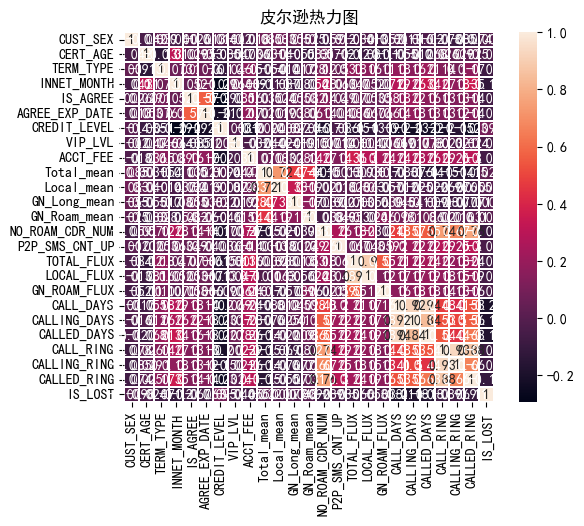

In [50]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False   
sns.heatmap(corr,linewidths=0.2,vmax=1.0, square=True,linecolor='white', annot=True)
plt.title('皮尔逊热力图')
plt.show()

In [51]:
feature_index = corr['IS_LOST'].drop('IS_LOST').abs() > 0.08 #挑选特征

In [52]:
feature_index.head()

CUST_SEX       False
CERT_AGE       False
TERM_TYPE      False
INNET_MONTH     True
IS_AGREE       False
Name: IS_LOST, dtype: bool

In [53]:
feature_name = feature_index.loc[feature_index].index

In [54]:
feature_name

Index(['INNET_MONTH', 'CREDIT_LEVEL', 'NO_ROAM_CDR_NUM', 'CALL_DAYS',
       'CALLING_DAYS', 'CALLED_DAYS', 'CALL_RING', 'CALLED_RING'],
      dtype='object')

In [55]:
X = data_new.loc[:, feature_name]    
y = data_new.loc[:, 'IS_LOST']       

In [56]:
X.head()

,INNET_MONTH,CREDIT_LEVEL,NO_ROAM_CDR_NUM,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLED_RING
USER_ID,,,,,,,,
U3114031824148707,25,67.0,0.000000,27.333333,23.000000,25.000000,37.333333,25.666667
U3114031824148874,25,65.0,337.666667,30.000000,25.333333,30.000000,94.333333,74.000000
U3114031824148975,25,65.0,122.000000,29.666667,29.333333,24.666667,37.666667,26.000000
U3114031824149138,25,65.0,116.000000,29.666667,28.333333,27.333333,35.333333,21.333333
U3114031824149150,25,65.0,24.000000,6.666667,5.666667,6.666667,8.666667,7.666667


In [57]:
y.head()

USER_ID
U3114031824148707    0.0
U3114031824148874    0.0
U3114031824148975    0.0
U3114031824149138    0.0
U3114031824149150    0.0
Name: IS_LOST, dtype: float64

In [58]:
y.value_counts()

0.0    290289
1.0      9679
Name: IS_LOST, dtype: int64

In [59]:
index_positive = y.index[y == 1]          
index_negative = np.random.choice(y.index[y == 0].tolist(), y.value_counts()[1])   

In [60]:
index_positive

Index(['U3114031824149372', 'U3114031924150616', 'U3114032124153268',
       'U3114032224154479', 'U3114032324155763', 'U3114032324155799',
       'U3114032424156898', 'U3114032424156915', 'U3114032524158271',
       'U3114032624158923',
       ...
       'U3116012903303948', 'U3116012903371155', 'U3116012972294748',
       'U3116013003381774', 'U3116013003422045', 'U3116013003436919',
       'U3116013103546397', 'U3116013103585252', 'U3116022072448110',
       'U3116022372477373'],
      dtype='object', name='USER_ID', length=9679)

In [61]:
index_negative

array(['U3114102726149257', 'U3114102025909848', 'U3115022429833791', ...,
       'U3115100141799011', 'U3114102967028955', 'U3115110971342577'],
      dtype='<U17')

In [62]:
X_positive = X.loc[index_positive, :]     
X_negative = X.loc[index_negative, :]    
y_positive = y.loc[index_positive]        
y_negative = y.loc[index_negative]        
X = pd.concat([X_positive, X_negative], axis=0)    
y = pd.concat([y_positive, y_negative], axis=0)   

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

```
stratify
若为None时，划分出来的测试集或训练集中，其类标签的比例也是随机的
若不为None时，划分出来的测试集或训练集中，其类标签的比例同输入的数组中类标签的比例相同，可以用于处理不均衡的数据集
```

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15486, 8), (3872, 8), (15486,), (3872,))

In [65]:
rfc = RandomForestClassifier()   
rfc.fit(X_train, y_train)         

RandomForestClassifier()

In [66]:
y_pre = rfc.predict(X_test)

In [67]:
rfc.score(X_test, y_test)
#据源码得return accuracy_score(y, self.predict(X), sample_weight=sample_weight)

0.7926136363636364

In [68]:
confusion_matrix(y_test, y_pre)

array([[1483,  453],
       [ 350, 1586]], dtype=int64)

In [69]:
print(classification_report(y_test, y_pre)) 

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      1936
         1.0       0.78      0.82      0.80      1936

    accuracy                           0.79      3872
   macro avg       0.79      0.79      0.79      3872
weighted avg       0.79      0.79      0.79      3872

